In [20]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import os
from tqdm import *

In [10]:
%matplotlib notebook

In [7]:
df = pd.read_csv("/home/sabyasachi/Projects/datasets/kitti/2011_09_26/2011_09_26_drive_0048_extract/velodyne_points/data/0000000000.txt", header=None, delimiter=' ')

<IPython.core.display.Javascript object>


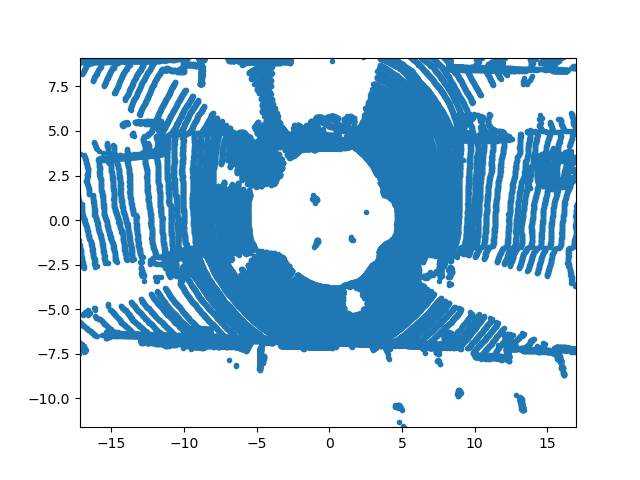

In [15]:
plt.plot(df[0], df[1], '.')

In [24]:
import math as m

def cart2sph(x,y,z):
    XsqPlusYsq = x**2 + y**2
    r = m.sqrt(XsqPlusYsq + z**2)               # r
    elev = m.atan2(z,m.sqrt(XsqPlusYsq))     # theta
    az = m.atan2(y,x)                           # phi
    return r, elev*57.2958, az*57.2958

def cart2sphA(pts):
    return np.array([cart2sph(x,y,z) for x,y,z in pts])

def appendSpherical(xyz):
    np.hstack((xyz, cart2sphA(xyz)))

In [25]:
r_list = []
theta_list = []
phi_list = []
for idx, row in tqdm_notebook(df.iterrows()):
    r, phi, theta = cart2sph(row[0], row[1], row[2])
    r_list.append(r)
    theta_list.append(theta)
    phi_list.append(phi)

In [31]:
phi_list

[2.1533311288320163,
 2.156514098399825,
 2.1606133003073675,
 2.1684983049502167,
 2.1607468858908683,
 2.1723785172020826,
 2.176905082261732,
 2.181691846835509,
 2.185634385058602,
 2.1887004767327776,
 2.193178598917819,
 2.1980779367533403,
 2.2014029451579833,
 2.206025249332943,
 2.2098695660467254,
 2.217326313950154,
 2.216911896692973,
 2.216415468099065,
 2.216819389166114,
 2.216909744794345,
 2.2162970437662795,
 2.216297574095545,
 2.216990699661624,
 2.2168011688803837,
 2.2162646981318623,
 2.2161764246593165,
 2.217371014386305,
 2.2164949168076196,
 2.2549945653053753,
 2.2587453869935814,
 2.2628767757745023,
 2.2666145258328396,
 2.270188824732943,
 2.273713306822783,
 2.278501609630063,
 2.281153253032229,
 2.2872272128233644,
 2.2887379334031532,
 2.372900911267068,
 2.3777774927504307,
 2.3813857564824756,
 2.386221812531817,
 2.3921729218745185,
 2.395654997973855,
 2.400011063319606,
 2.4061174796079543,
 2.4096905978563856,
 2.41488122826127,
 2.4193457040926

In [32]:
pd.DataFrame(phi_list).describe()

,0
count,121605.000000
mean,-8.508413
std,7.445859
min,-23.789745
25%,-14.660868
50%,-7.261028
75%,-2.223267
max,4.837383


In [33]:
import math

def polar2cart(r, theta, phi):
    return [
         r * math.sin(theta) * math.cos(phi),
         r * math.sin(theta) * math.sin(phi),
         r * math.cos(theta)
    ]

In [ ]:
x_list = []
y_list = []
z_list = []

for r, theta, phi in 